In [54]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [55]:
df = pd.read_csv('mushrooms.csv')

In [56]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [58]:
df.shape

(8124, 23)

In [59]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [60]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

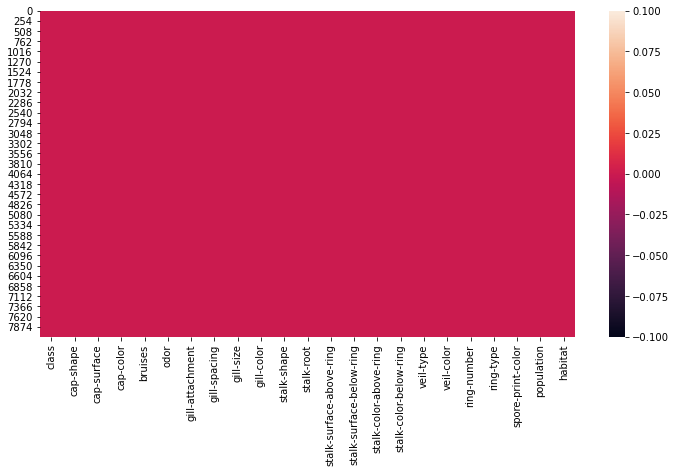

In [61]:
plt.figure(figsize = [12,6])
sns.heatmap(df.isnull())
plt.show()

In [62]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [63]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [64]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

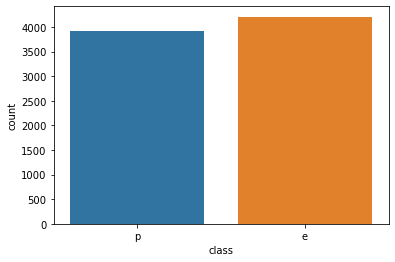

In [65]:
# count plot
sns.countplot(df['class'])

(array([3916.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4208.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

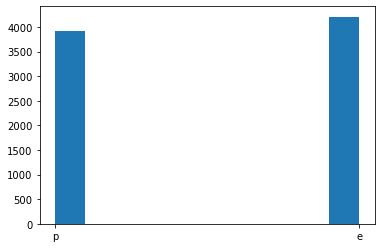

In [66]:
plt.hist(df["class"])

Obervation: After observing the above  graphs we conclude that the data is normally distributed ,that is , no imbalance in dataset.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


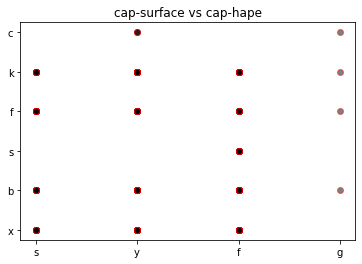

In [67]:
#multivarint analysis
plt.scatter(df['cap-surface'], df['cap-shape'],alpha = 0.5, c = (0,0,0), edgecolors = 'r')
plt.title("cap-surface vs cap-hape")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


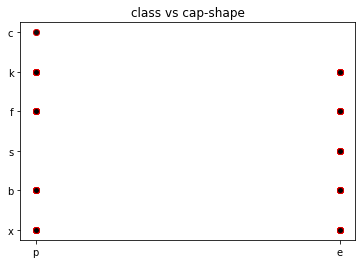

In [68]:
plt.scatter(df['class'], df['cap-shape'],alpha = 0.5, c = (0,0,0), edgecolors = 'r')
plt.title("class vs cap-shape")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


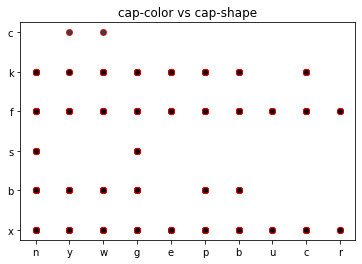

In [69]:
plt.scatter(df['cap-color'], df['cap-shape'],alpha = 0.5, c = (0,0,0), edgecolors = 'r')
plt.title("cap-color vs cap-shape")
plt.show()

observation: from the above graphs we cant see any trends in the graphs, its may be due to data type as object. so let us tranform it to int

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [71]:
df_features = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [72]:
for i in df_features:
    df[i] = le.fit_transform(df[i])

In [73]:
df['class'].unique()#confirming the tranformation

array([1, 0])

In [75]:
corr_matrix = df.corr()

In [76]:
corr_matrix

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


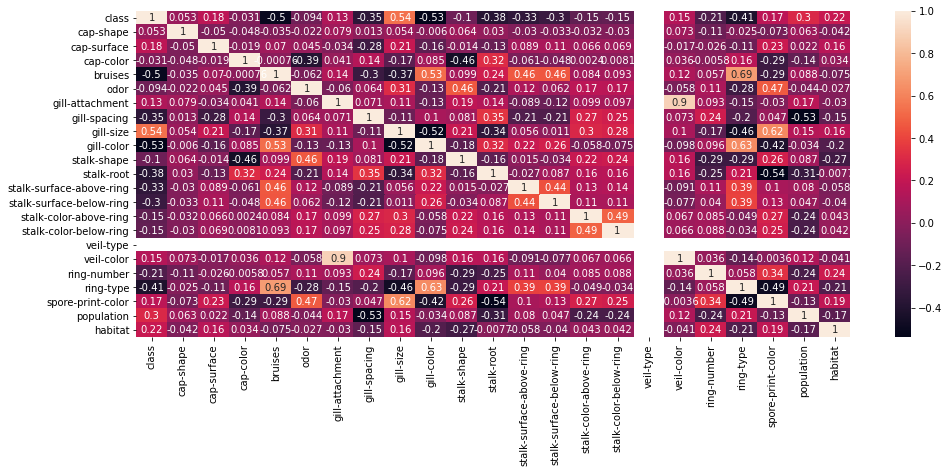

In [77]:
plt.figure(figsize = [16,6])
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [78]:
#checking correlation with the class varibale

In [79]:
corr_matrix['class'].sort_values(ascending = False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

observation:

Note: The values provided in each columns of the dataset corresponds to a category ,therefore every value of the data set is important.
    The values in each columns can be imbalanced but cannot be outlier as the value corresponds to some category.Hence, there is no need to check for the outliers present in the dataset

In [80]:
#checking for the skewness present in the data set

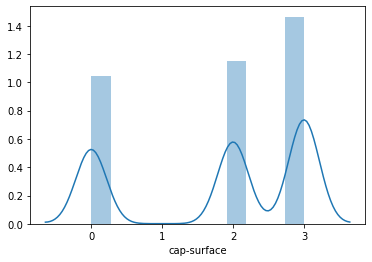

In [81]:
sns.distplot(df['cap-surface'])

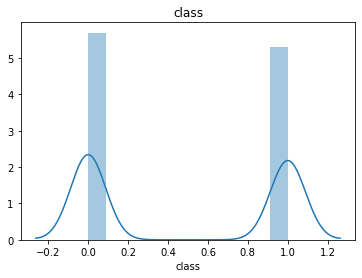

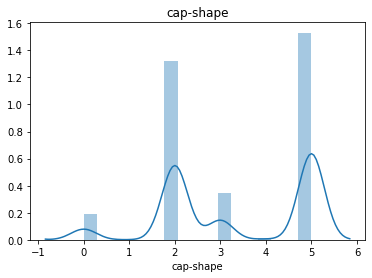

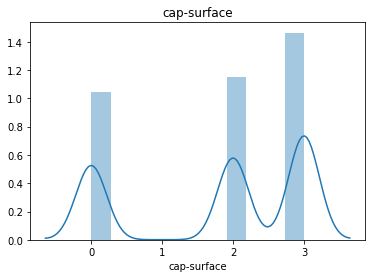

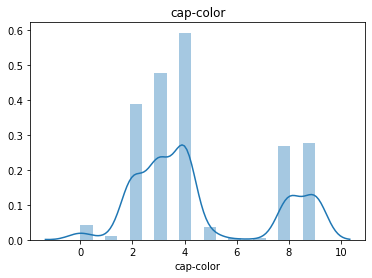

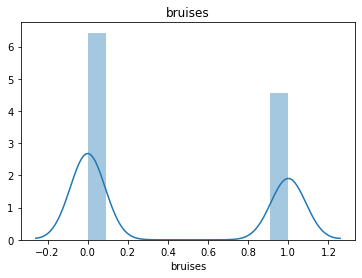

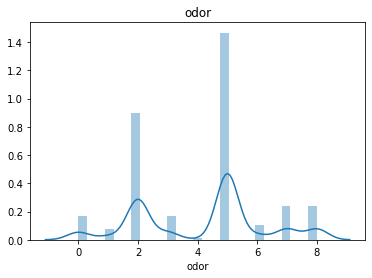

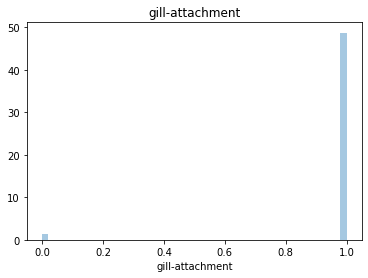

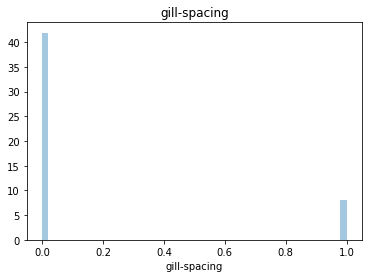

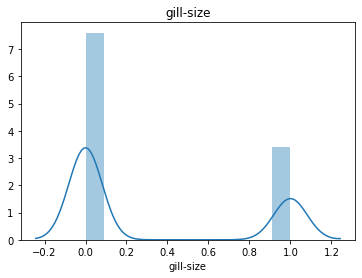

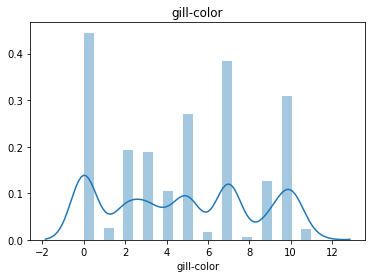

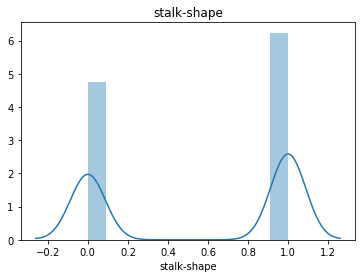

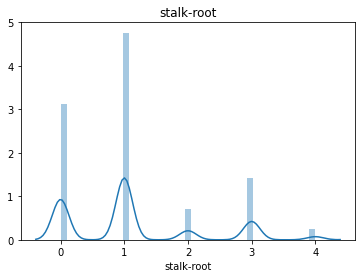

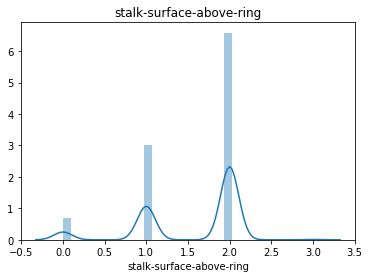

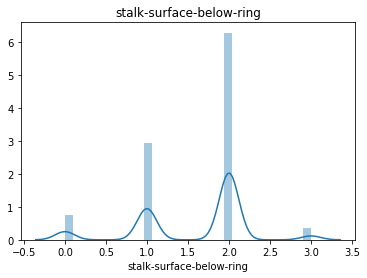

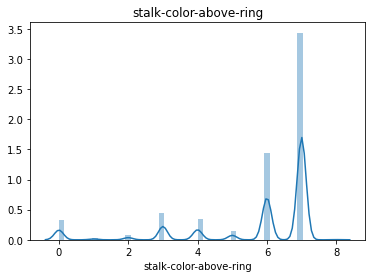

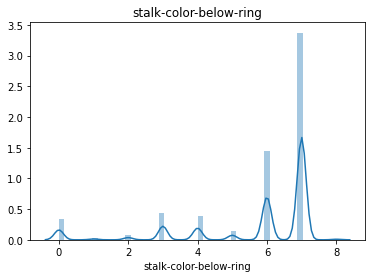

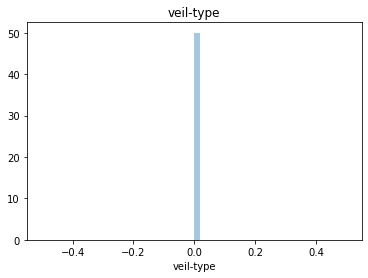

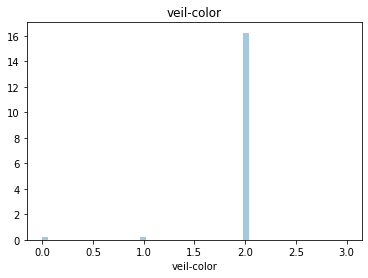

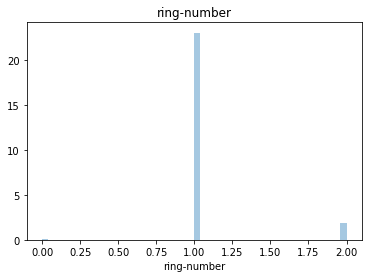

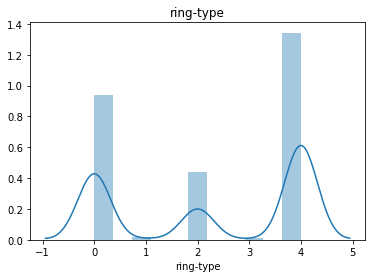

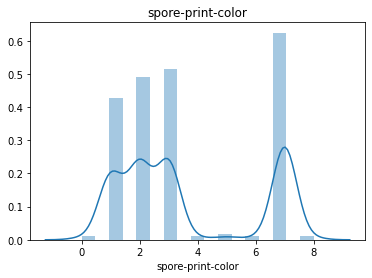

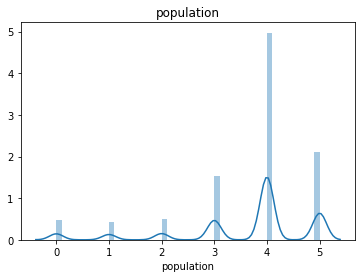

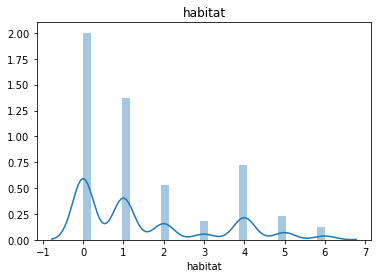

In [82]:
for i in df_features:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

In [83]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-type                   0.000000
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Observation: We can conclude that skewness is present in the most of the columns.We will be removing that.

In [84]:
#spliting x and y

In [85]:
x = df.drop("class", axis = 1)
y = df["class"]

In [86]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,1,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,1,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,1,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,1,0,7,4,2


In [87]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [88]:
#removing skewness of the data

In [124]:
df_new.skew()

cap-shape                  -0.205860
cap-surface                -0.473764
cap-color                   0.004059
bruises                     0.342750
odor                       -0.144660
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                 -0.246738
stalk-shape                -0.271345
stalk-root                  0.023182
stalk-surface-above-ring   -0.438332
stalk-surface-below-ring   -0.114150
stalk-color-above-ring     -0.964471
stalk-color-below-ring     -0.925320
veil-type                   0.000000
veil-color                  5.797741
ring-number                -0.499098
ring-type                  -0.339232
spore-print-color           0.018174
population                 -0.368219
habitat                     0.123132
dtype: float64

Observation: Removed skewness

In [93]:
x = df_new

In [94]:
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.035775,0.050170,-0.026740,1.185917,0.881477,0.162896,-0.438864,1.494683,-0.080699,-1.144806,...,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
1,1.035775,0.050170,1.563194,1.185917,-2.030416,0.162896,-0.438864,-0.669038,-0.080699,-1.144806,...,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,-1.474856,0.116348
2,-2.027882,0.050170,1.305930,1.185917,-0.528118,0.162896,-0.438864,-0.669038,0.186585,-1.144806,...,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,0.019064,-1.474856,1.066339
3,1.035775,0.998646,1.305930,1.185917,0.881477,0.162896,-0.438864,1.494683,0.186585,-1.144806,...,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,0.933807,-0.537148,-0.800530,1.515489
4,1.035775,0.050170,-0.490015,-0.843230,0.417908,0.162896,2.278612,-0.669038,-0.080699,0.873511,...,0.553899,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,0.019064,-2.108626,0.116348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.234089,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.553899,-0.939926,-0.902249,0.0,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8120,1.035775,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,1.522575,-1.144806,...,0.553899,-0.939926,-0.902249,0.0,-5.190986,-0.200377,0.933807,-2.806195,0.154124,0.702479
8121,-0.851275,0.050170,-0.026740,-0.843230,0.417908,-6.138869,-0.438864,-0.669038,0.186585,-1.144806,...,0.553899,-0.939926,-0.902249,0.0,-4.634069,-0.200377,0.933807,-2.806195,-1.898575,0.702479
8122,-0.234089,0.998646,-0.026740,-0.843230,1.794391,0.162896,-0.438864,1.494683,-1.502261,0.873511,...,-0.994621,0.765581,0.769774,0.0,0.098221,-0.200377,-1.291192,1.298625,0.154124,0.702479


In [96]:
#for random_state check
from sklearn.linear_model import LogisticRegression
Maxaccu = 0
Maxrow = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.20,random_state = i)
    le = LogisticRegression()
    le.fit(x_train,y_train)
    prdle =le.predict(x_test)
    accu = accuracy_score(y_test,prdle)
    if accu>Maxaccu:
        Maxaccu = accu
        Maxrow = i
print("max accuracy is : ",Maxaccu ,"at random state : ",Maxrow)

max accuracy is :  0.9636923076923077 at random state :  164


In [97]:
#creating train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =.20,random_state = 164)

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prdlr = lr.predict(x_test)
print(accuracy_score(y_test,prdlr))
print(confusion_matrix(y_test,prdlr))
print(classification_report(y_test,prdlr))

0.9636923076923077
[[802  24]
 [ 35 764]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       826
           1       0.97      0.96      0.96       799

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



Observation: The accuracy of the model is 96.37 percent . 
The model Learning:
Precision value(positive predictive value) for 0(poison) is 96% whereas the Precision value for 1(edible) is 97% .And recall(sensitivity) for 0 is 97% and recall value for 1 is 96%. Which means the performance of the model is high.

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prdtc = dtc.predict(x_test)
print(accuracy_score(y_test,prdtc))
print(confusion_matrix(y_test,prdtc))
print(classification_report(y_test,prdtc))

1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Observation:Precision value(positive predictive value) for 0(poison) is 100% whereas the Precision value for 1(edible) is 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which means the performance of the model is high.

In [101]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
prdrfc = rfc.predict(x_test)
print(accuracy_score(y_test,prdrfc))
print(confusion_matrix(y_test,prdrfc))
print(classification_report(y_test,prdrfc))

1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Observation:Precision value(positive predictive value) for 0(poison) is 100% whereas the Precision value for 1(edible) is 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which means the performance of the model is high.

In [104]:
from sklearn.svm import SVC
svc = SVC(kernel = i)
svc.fit(x_train,y_train)
prdsvc = svc.predict(x_test)
print(accuracy_score(y_test,prdsvc))
print(confusion_matrix(y_test,prdsvc))
print(classification_report(y_test,prdsvc))

1.0
[[826   0]
 [  0 799]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       826
           1       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



Observation:Precision value(positive predictive value) for 0(poison) is 100% whereas the Precision value for 1(edible) is 100% .And recall(sensitivity) for 0 is 100% and recall value for 1 is 100%. Which means the performance of the model is high.

Conclusion:We are getting 100% accuracy for DecisionTreeClassifier,RandomForestClassifier and SVC. This can be due to overfitting or under fitting so to confirm that we will check it in further steps.

## Crossvalidation 

In [109]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,x,y,cv = 5)
print("Cross validation score of Logistic Regression is ",scr.mean()

Cross validation score of Logistic Regression is  0.8181541492989769


In [110]:
scr = cross_val_score(dtc,x,y,cv = 5)
print("Cross validation score of Decision tree classifier is ",scr.mean())

Cross validation score of Decision tree classifier is  0.9606056839712013


In [111]:
scr = cross_val_score(rfc,x,y,cv = 5)
print("Cross validation score of Random Forest classifier is ",scr.mean())

Cross validation score of Random Forest classifier is  0.892137627889352


In [112]:
scr = cross_val_score(svc,x,y,cv = 5)
print("Cross validation score of Support vector classifier is ",scr.mean())

Cross validation score of Support vector classifier is  0.8959588480485031


Observation : Due to overfitting or underfitting of model the accuracy of the model was very high as compared to the actual accuracy.

We will select the model ,which will have least difference of the accuracy score and cross value score.

Conclusion: Decision tree has the least difference between the accuracy score and cross value score.So we will choose Decision tree classifier

## Hyperarameter tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [116]:
#creating parameter list to pass in GridSearchCV
parameters = {'max_depth' : np.arange(2,15),
             'criterion': ['gini','entropy']}

In [118]:
GVC = GridSearchCV(DecisionTreeClassifier(),parameters,cv = 5)

In [119]:
GVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [120]:
GVC.best_params_ #to check best parameter

{'criterion': 'gini', 'max_depth': 7}

In [121]:
Mod = DecisionTreeClassifier(criterion = 'gini',max_depth = 7,random_state = 164)
Mod.fit(x_train,y_train)
pred = Mod.predict(x_test)
print("accuracy score of the model is :",accuracy_score(y_test,pred)*100)

accuracy score of the model is : 100.0


Conclusion: accuracy of the model is 100 percent

### Saving the model

In [122]:
import joblib
joblib.dump(Mod,"MushroomDatasetDTC.pkl")

['MushroomDatasetDTC.pkl']